In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,intersection_percentage,chunk_composition
0,776662,0.42,0.92,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2
1,776782,0.57,0.75,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...
2,776793,0.75,0.25,0.00,v2 v1
3,776828,0.33,0.67,0.00,v2 v1 v2
4,776863,0.25,0.75,0.00,v2 v1


In [3]:
df = df[df['v1_percentage']!= -1]
print(len(df))

10738


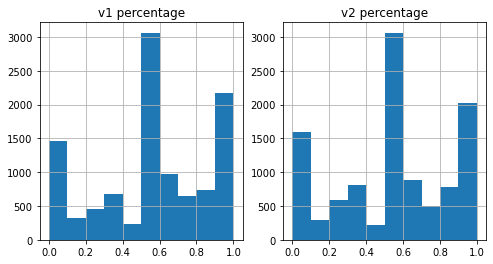

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
df['v1_percentage'].hist(ax=ax[0])
df['v2_percentage'].hist(ax=ax[1])
ax[0].set_title('v1 percentage')
ax[1].set_title('v2 percentage')
plt.show()


<AxesSubplot:>

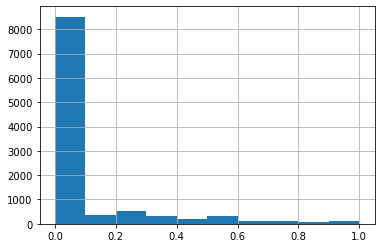

In [11]:
df['intersection_percentage'].hist()

In [5]:
def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

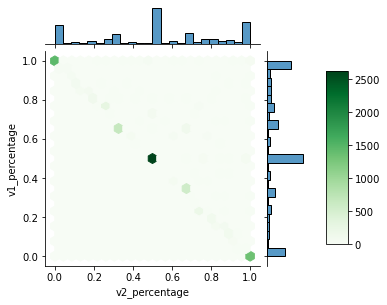

In [6]:
x = df['v2_percentage']
y = df['v1_percentage']
p1 = sns.jointplot(x=x, y=y, kind='hex', cmap='Greens')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible

cbar_ax = p1.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.show()

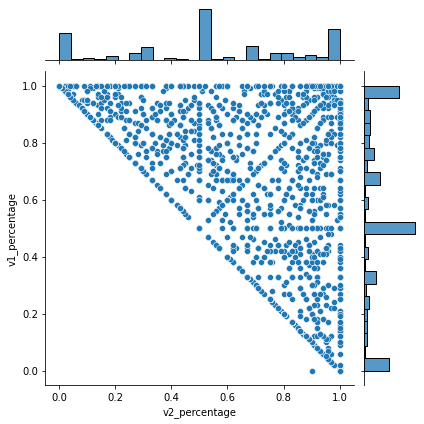

In [7]:
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='scatter', cmap='BuPu')
plt.show()

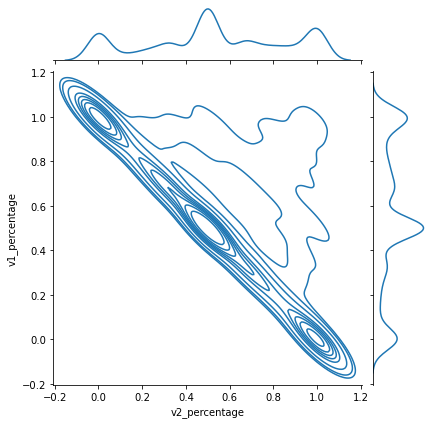

In [8]:
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='kde')
plt.show()

In [10]:
v1v2 = df[df['chunk_composition'] == ' v1 v2']
v2v1 = df[df['chunk_composition'] == ' v2 v1']
v1_only = df[df['chunk_composition'] == ' v1']
v2_only = df[df['chunk_composition'] == ' v2']
v1v2v1 = df[df['chunk_composition'] == ' v1 v2 v1']
v2v1v2 = df[df['chunk_composition'] == ' v2 v1 v2']
no_alternation = len(v1v2) + len(v2v1)
some_alternation = len(v1v2v1) + len(v2v1v2)
print(f'Only v1 lines: {len(v1_only)} ({(len(v1_only)/len(df)*100):.2f}%)')
print(f'Only v2 lines: {len(v2_only)} ({(len(v2_only)/len(df)*100):.2f}%)')
print(f'No alternation (v1v2): {len(v1v2)} ({(len(v1v2)/len(df)*100):.2f}%)')
print(f'No alternation (v2v1): {len(v2v1)} ({(len(v2v1)/len(df)*100):.2f}%)')
# print(f'No alternation (aggregate): {no_alternation} ({(no_alternation/len(df)*100):.2f}%)')
print(f'Some alternation (v1v2v1 or v2v1v2): {some_alternation} ({(some_alternation/len(df)*100):.2f}%)')
easy_cases = no_alternation + some_alternation + len(v1_only) + len(v2_only)
remaining = len(df) - easy_cases

print('-------------')
print(f'Easier cases (all above): {easy_cases} ({(easy_cases/len(df)*100):.2f}%)')
print(f'Remaining (harder cases): {remaining} ({(remaining/len(df)*100):.2f}%)')



Only v1 lines: 1451 (13.51%)
Only v2 lines: 1345 (12.53%)
No alternation (v1v2): 2842 (26.47%)
No alternation (v2v1): 2189 (20.39%)
Some alternation (v1v2v1 or v2v1v2): 497 (4.63%)
-------------
Easier cases (all above): 8324 (77.52%)
Remaining (harder cases): 2414 (22.48%)
